# Punto 3.

Para determinar la relación entre el Bitcoin y el oro, la plata y el aceite se realizan regresiones lineales con cada producto.
Primero, se estudia la relación entre el Bitcoin y el oro. Para ello se descargan datos de un año de precios y se organizan en formato de punto flotante.
Si $y_i$ es el valor del oro en el día $i$-ésimo, se desea encontrar el vector $x=[a,b]$ de manera que el polinomio $p(x)=ax+b$ se ajuste mejor al precio del oro, es decir, $\sum_{i=1}^{255} (a*x^{i}+b-y_i)^2$, dónde $x_i$ es el precio del Bitcoin en el día $i$-ésimo, sea un valor mínimo.

In [1]:
using CSV
using DataFrames

Qo = CSV.read("GoldYear.csv", DataFrame);
P = CSV.read("BitcoinYear.csv",DataFrame);
P.Price .= replace.(P.Price, "," => "");
P.Price = parse.(Float64, P.Price);

Se traslada el modelo a un problema matricial, se desea minimizar el valor de $||Ax-b||$, con $A$ y $b$ como se muestra a continuación.

In [2]:
bo = Array(Qo.Close);
Ao = [P.Price ones(254,1)];

Y se soluciona utilizando el paquete LinearAlgebra.

In [3]:
using LinearAlgebra

xho = pinv(Ao)*bo

2-element Vector{Float64}:
    -0.02374683506801703
 19227.680522624403

Y realizamos una gráfica de los datos. En naranja se observa la predicción utilizando regresiones.

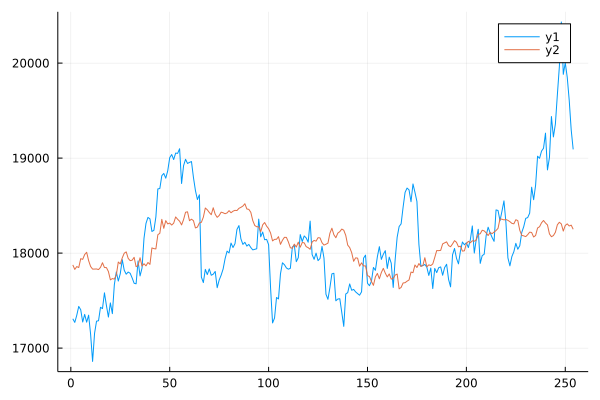

In [5]:
using Plots

predo = xho[1]*Ao[:,1] + xho[2]*ones(254,1)
plot(bo)
plot!(predo)

Adicionalmente, es posible utilizar qué tan relacionados están el precio del Bitcoin y del oro utilizando métodos estadísticos como analizar la covarianza y el coeficiente de Pearson.

In [12]:
using Statistics

print("La covarianza es ", cov(Ao[:,1]::AbstractVector, bo::AbstractVector), " y el coeficiente de Pearson es ", cor(Ao[:,1]::AbstractVector, bo::AbstractVector))


La covarianza es -2.0417977800815413e6 y el coeficiente de Pearson es -0.3853322693966099

Como el coeficiente de Pearson es cercano a 0, se puede decir que hay poca relación lineal entre el precio del Bitcoin y del oro. Como es negativo, se observa que la relación es inversa. Esta relación inversa que puede observar al graficar la recta obtenida en el punto anterior.

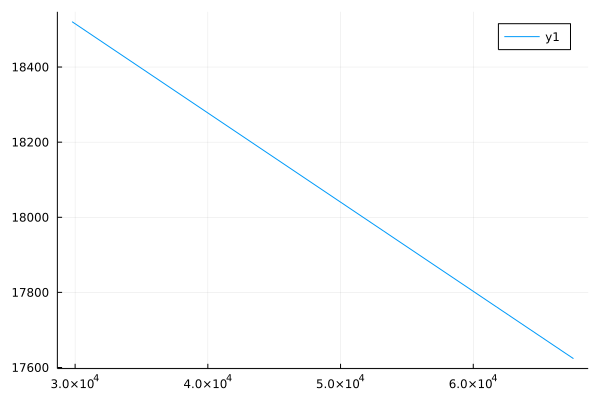

In [13]:
plot(Ao[:,1], predo)

Ahora se repite el procedimiento anterior para analizar la relación entre el precio del Bitcoin y el precio de la plata.

In [15]:
Qp = CSV.read("SilverYear.csv", DataFrame);
P1 = CSV.read("BitcoinYear1.csv",DataFrame);
P1.Price .= replace.(P1.Price, "," => "");
P1.Price = parse.(Float64, P1.Price);
bp = Array(Qp.Close);
Ap = [P1.Price ones(253,1)];

In [16]:
xhp = pinv(Ap)*bp

2-element Vector{Float64}:
    -0.037537903703681694
 26415.6782515018

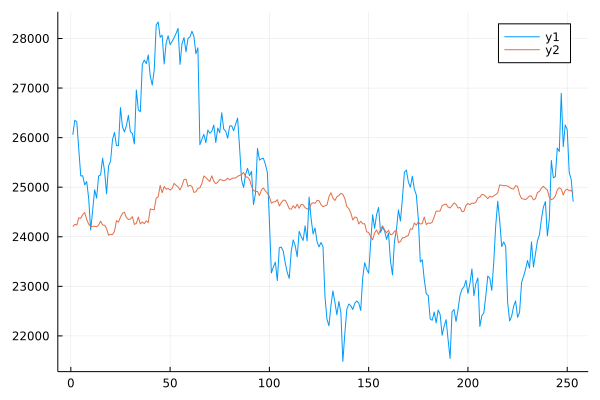

In [17]:
predp = xhp[1]*Ap[:,1] + xhp[2]*ones(253,1)
plot(bp)
plot!(predp)

In [18]:
print("La covarianza es ", cov(Ap[:,1]::AbstractVector, bp::AbstractVector), " y el coeficiente de Pearson es ", cor(Ap[:,1]::AbstractVector, bp::AbstractVector))

La covarianza es -3.2257441247098316e6 y el coeficiente de Pearson es -0.20221774240245832

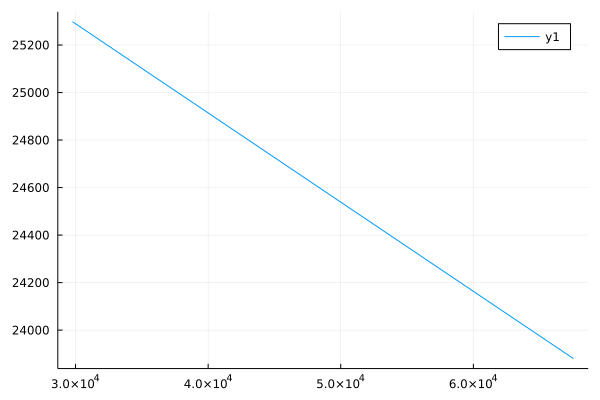

In [20]:
plot(Ap[:,1], predp)

Lo cuál presenta resultados similares a los obtenidos con el oro. Finalmente, se repite el procedimiento utilizando datos relacionados con el precio del aceite en el último año.

In [22]:
Qoil = CSV.read("OilYear.csv", DataFrame);
boil = Array(Qoil.Close);
Aoil = [P1.Price ones(253,1)];

In [23]:
xhoil = pinv(Aoil)*boil

2-element Vector{Float64}:
    -0.07339431264933877
 26407.634319276327

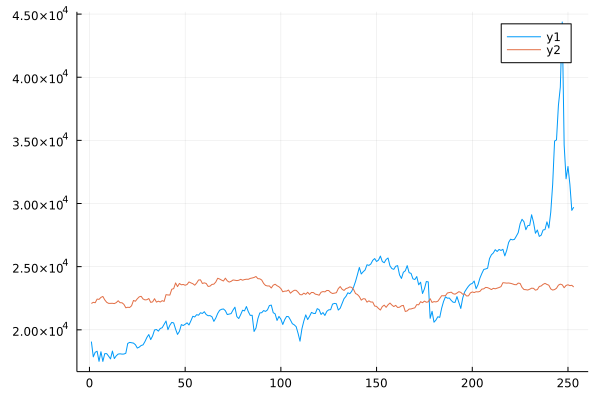

In [24]:
predoil = xhoil[1]*Aoil[:,1] + xhoil[2]*ones(253,1)
plot(boil)
plot!(predoil)

In [25]:
print("La covarianza es ", cov(Aoil[:,1]::AbstractVector, boil::AbstractVector), " y el coeficiente de Pearson es ", cor(Aoil[:,1]::AbstractVector, boil::AbstractVector))

La covarianza es -6.306992385206099e6 y el coeficiente de Pearson es -0.1763286634627426

La cuál se comporta de manera similar al oro y la plata; con un coeficiente de Pearson negativo y cercano al cero.